## Link to the Data-Set used
https://www.kaggle.com/datasets/umerhaddii/european-flights-dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = 'flights.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG)
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)


## 1. Introduction
This analysis aims to explore and analyze the European Flights Dataset. We will formulate four questions regarding the dataset, develop corresponding hypotheses, choose a level of significance, test the hypotheses, and interpret the results.


## 2. Questions & Hypotheses

### Question № 1
**Is there a significant difference in the number of IFR departures between two randomly selected months?**
##### Hypotheses
H0: There is no significant difference in the number of IFR departures between the two months. (µ1 = µ2)

Ha: There is a significant difference in the number of IFR departures between the two months. (µ1 ≠ µ2)

##### Hypotheses Test


t-statistic: -12.038944081672385
p-value: 2.5612267624466743e-33


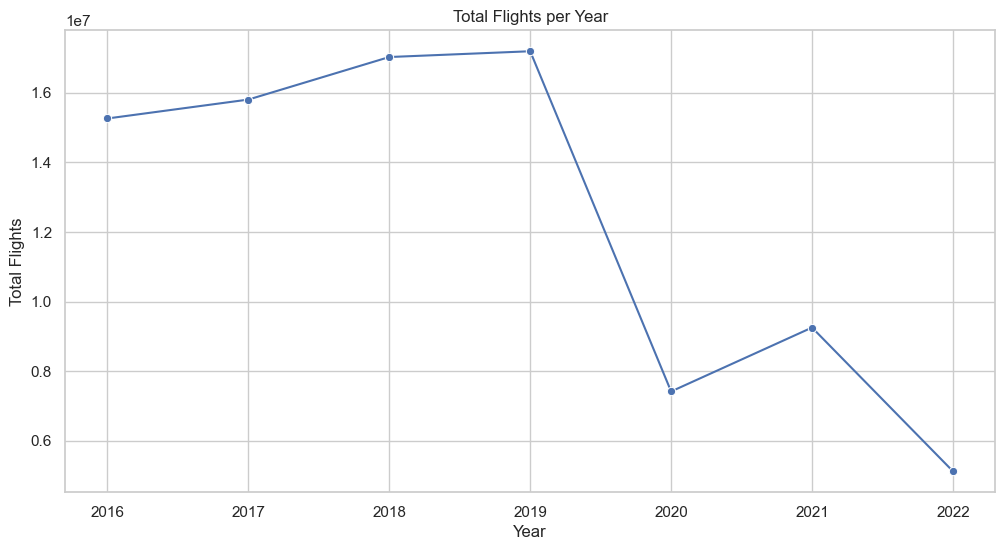

In [5]:
import pandas as pd
import scipy.stats as s
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('flights.csv')

# Drop missing values
jan_data = df[df['MONTH_NUM'] == 1]['FLT_DEP_IFR_2'].dropna()
jun_data = df[df['MONTH_NUM'] == 6]['FLT_DEP_IFR_2'].dropna()

# Perform t-test
t_stat, p_value = s.ttest_ind(jan_data, jun_data)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)


# Setting up visualization aesthetics
sns.set(style="whitegrid")

# Plot 1: Line plot for total flights per year
plt.figure(figsize=(12, 6))
flights_per_year = flights_df.groupby('YEAR')['FLT_TOT_1'].sum().reset_index()
sns.lineplot(x='YEAR', y='FLT_TOT_1', data=flights_per_year, marker='o')
plt.title('Total Flights per Year')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.show()



### Question № 2
**Is the total number of IFR movements dependent on the country?**
##### Hypotheses
H0: The total number of IFR movements is independent of the country. (No significant difference in means across countries)

Ha: The total number of IFR movements is dependent on the country. (Significant difference in means across countries)


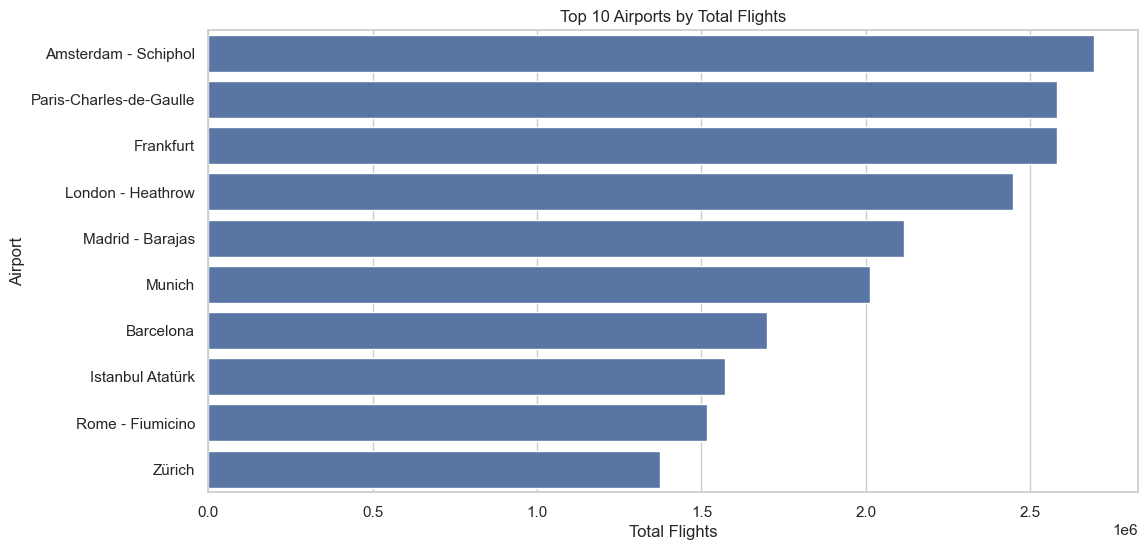

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flights.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Check for and remove rows with NaN or inf values in the relevant columns
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['FLT_TOT_IFR_2', 'STATE_NAME'])

# Perform ANOVA test
countries = df_clean['STATE_NAME'].unique()
grouped_data = [df_clean[df_clean['STATE_NAME'] == country]['FLT_TOT_IFR_2'] for country in countries]

anova_result = stats.f_oneway(*grouped_data)

anova_result

plt.figure(figsize=(12, 6))
flights_per_airport = flights_df.groupby('APT_NAME')['FLT_TOT_1'].sum().reset_index()
flights_per_airport = flights_per_airport.sort_values(by='FLT_TOT_1', ascending=False).head(10)  # Top 10 airports
sns.barplot(x='FLT_TOT_1', y='APT_NAME', data=flights_per_airport)
plt.title('Top 10 Airports by Total Flights')
plt.xlabel('Total Flights')
plt.ylabel('Airport')
plt.show()


### Question № 3
**Q3. Does the number of IFR arrivals correlate with the number of IFR departures?**
##### Hypotheses

H0: There is no correlation between the number of IFR arrivals and the number of IFR departures. (ρ = 0)

Ha: There is a correlation between the number of IFR arrivals and the number of IFR departures. (ρ ≠ 0)


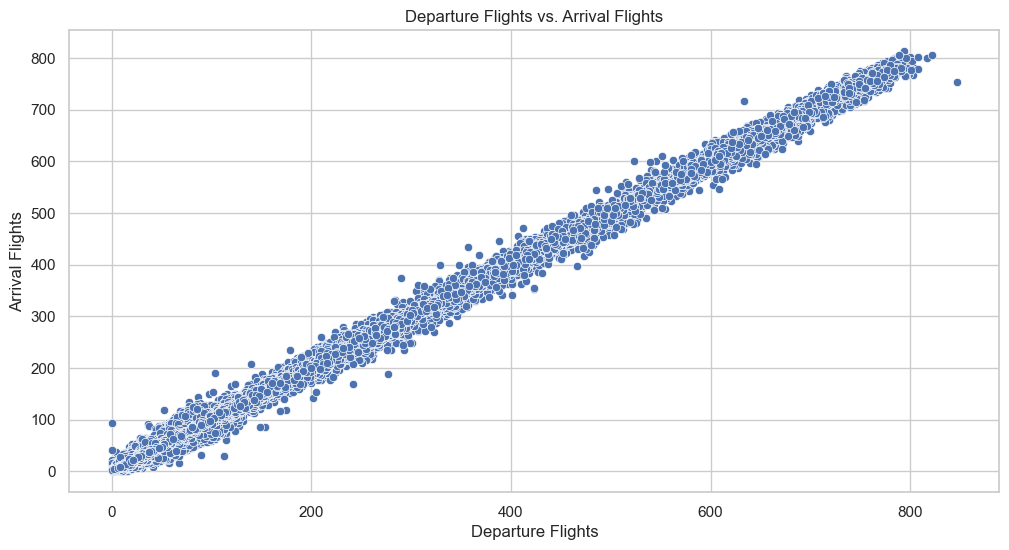

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flights.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Check for and remove rows with NaN or inf values in the relevant columns
df_clean = df[['FLT_ARR_IFR_2', 'FLT_DEP_IFR_2']].replace([np.inf, -np.inf], np.nan).dropna()

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df_clean['FLT_ARR_IFR_2'], df_clean['FLT_DEP_IFR_2'])

correlation, p_value

plt.figure(figsize=(12, 6))
sns.scatterplot(x='FLT_DEP_1', y='FLT_ARR_1', data=flights_df)
plt.title('Departure Flights vs. Arrival Flights')
plt.xlabel('Departure Flights')
plt.ylabel('Arrival Flights')
plt.show()


### Question № 4
**Is there a significant increase in the total number of IFR movements from January to December within a year?**
##### Hypotheses
H0: There is no significant increase in the total number of IFR movements from January to December. (µJan = µDec)

Ha: There is a significant increase in the total number of IFR movements from January to December. (µJan < µDec)

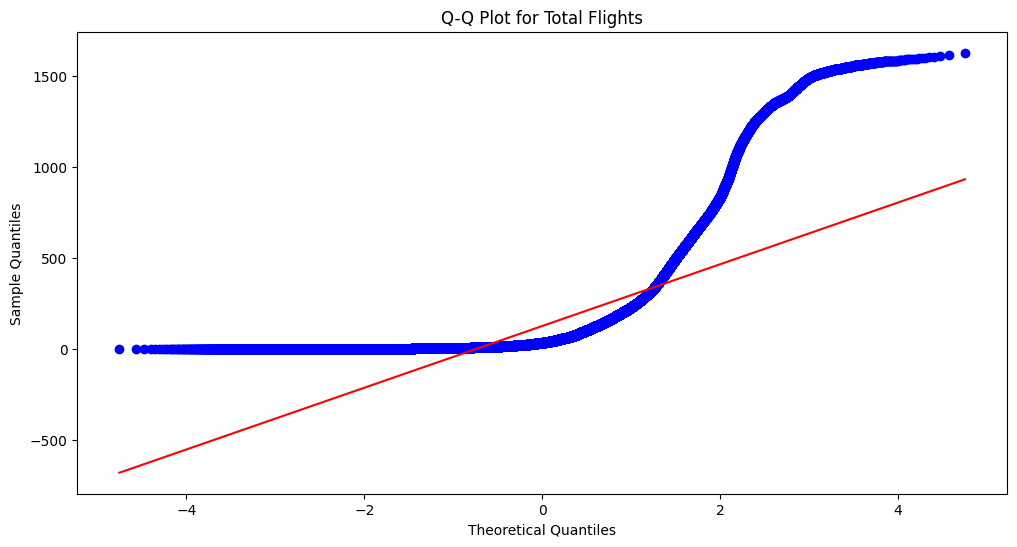

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'flights.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Check for and remove rows with NaN or inf values in the relevant columns
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['FLT_TOT_IFR_2', 'STATE_NAME'])

# Perform ANOVA test
countries = df_clean['STATE_NAME'].unique()
grouped_data = [df_clean[df_clean['STATE_NAME'] == country]['FLT_TOT_IFR_2'] for country in countries]

anova_result = stats.f_oneway(*grouped_data)

anova_result

# Q-Q plot for checking normality of total flights
plt.figure(figsize=(12, 6))
stats.probplot(df['FLT_TOT_1'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Total Flights')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
